In [21]:
import numpy as np
import os, errno

from PIL import Image

from sklearn.cluster import KMeans
from skimage.color import rgb2hed

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline



In [22]:
import sys
print(sys.version)

3.5.0 (v3.5.0:374f501f4567, Sep 12 2015, 11:00:19) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]


In [23]:
def calculateMeanHE(image):
    hedImage = rgb2hed(image) # hed is short for Hematox, Eosin, DAB
    hemaValues = hedImage[:, :, 0]
    eosValues = hedImage[:, :, 1]
    
    return (hemaValues.mean(), eosValues.mean())

In [24]:
def symlink_rel(src, dst):
    rel_path_src = os.path.relpath(src, os.path.dirname(dst))
    os.symlink(rel_path_src, dst)

In [25]:
directory = "../Data/train"
mean_heList = []
image_names = []

for filename in os.listdir(directory):
    if not filename.startswith('.') and '.tif' in filename:
        image = Image.open(os.path.join(directory, filename))
        image_names.append(filename)
        mean_heList.append(calculateMeanHE(image))



In [26]:
image_names

['f0c2a0b8ef3024f407fa97d852d49be0215cafe0.tif',
 '99ef485f205645918613cd04281098daa7c17819.tif',
 'e2612e173abd0e8bb54a3c3db3f264b63d80bffb.tif',
 '6d1bb57c0606f05dbd75f90a8d9e21a57e1267e0.tif',
 '9c043ab2adadfeb758c71d21432fccd3e43565c0.tif',
 '9cc775713dd09351172a350871a547346af08027.tif',
 '1996c210f020134e986823ca7d4df0a70a799c34.tif',
 '270d16e6b9d88f09f3cc2e538f23091b186a33e5.tif',
 '731fe361f4af33b5e4f11d74b2bc7508171904e6.tif',
 'c7cf86c53ef00698e1e46f430e8527b534bd0368.tif',
 'fa806bcfba66f3bb4a0b12c17712c73cf7e77c13.tif',
 '215aa53e2d70b0e800bde59737676c7ff6e50d6e.tif',
 '1c1b9b8dc88097d7df41ca9a24111359fd44a57d.tif',
 '7598927e0d335414501b010a61b23af67ab87a82.tif',
 'f7d0c81604f942756bf9326fc00ca210cbb205fa.tif',
 'f683eb1dbac270cdb404dbe67adecde6eb765c26.tif',
 'ca3308d0bf06d6eb323b268fb9aa6acb0defe52a.tif',
 '7e45df9e3833b03a4491ef04de755bb04623ab6d.tif',
 '68a36318a39cd5b08b4df526006ad923a8c67bdf.tif',
 '0c5c327d301c8117f4bfad434075d5966ebb5a14.tif',
 '1f153d055917f1a035

In [27]:
meanHEMatrix = np.asarray(mean_heList)
kmeans = KMeans(n_clusters=2, random_state=0).fit(meanHEMatrix)



In [28]:
# make cluster directories first
# then make a symbolic link of every image in the corresponding cluster directory
for filename in os.listdir(directory):
    if not filename.startswith('.') and filename.endswith('.tif'):
        for cluster in range(len(set(kmeans.labels_))): # count of distinct elements = no. of clusters
            os.makedirs(directory + '/{}'.format(cluster) , exist_ok=True)


len(kmeans.labels_)

9999

In [29]:
# Check if there is a new file
sub_directories = []
for name in os.listdir(directory):
#     print(name)
    if not name.startswith('.') and not name.endswith('.tif'):
        sub_directories.append(name)
        
kmeans.labels_
sub_directories

['0', '1']

note there is an error here that needs to be handled, sometimes (still dont know when), all of the images get put into cluster 0 as well as cluster 1,

also some images are duplicated into both clusters...??

In [19]:

# try:

for i in range(len(image_names)):
    # if there isnt already a symlink of this image in the coressponding subdirectory
    if image_names[i] not in os.listdir(directory + '/' + sub_directories[kmeans.labels_[i]]): 
        symlink_rel(directory + '/{}'.format(image_names[i]) , 
                   directory + '/{}'.format(kmeans.labels_[i]) + '/' + image_names[i])


In [16]:
os.getcwd()

'/Users/mostafa.osama2/Desktop/finalproject/Generalised-WSI-Clustering'

In [41]:
os.symlink("../Data/train/0a0bd016a9f4058f109f3b23ed9363bc11d69107.tif", "../Data/x/new3.tif")

In [8]:
# make a mapping between file names and labels for easy evaluation of the correction of symlinks
bool_list = []
mappingdict = {}

for i in range(len(image_names)):
    mappingdict[image_names[i]] = kmeans.labels_[i]
    
# check kmeans labels against symbolic links
for subdirectory in sub_directories:
    for image in os.listdir(directory + '/' + subdirectory):
        if str(mappingdict[image]) == subdirectory:
            bool_list.append("True")
        else:
            bool_list.append("False")

Text(0, 0.5, 'Eosin')

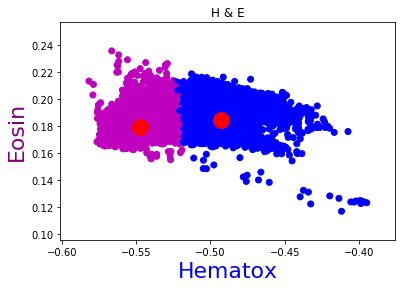

In [9]:
LABEL_COLOR_MAP = {0 : 'b', 1 : 'm'} # blue is for hematox and magneta (purple) is for eosin

label_color = [LABEL_COLOR_MAP[l] for l in kmeans.labels_]

plt.scatter(meanHEMatrix[:,0], meanHEMatrix[:,1], c=label_color) # column 0 is hematox, column 1 is Eosin

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, alpha=1);

plt.title('H & E')
plt.xlabel('Hematox',fontsize=22, color='blue')
plt.ylabel('Eosin',fontsize=22, color='purple')


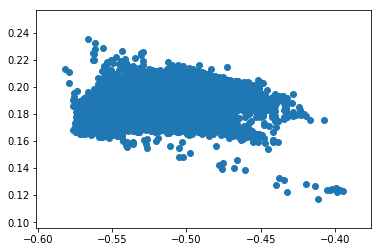

In [10]:
plt.scatter(meanHEMatrix[:,0], meanHEMatrix[:,1]) # column 0 is hematox, column 1 is Eosin